# Cross Entropy Loss

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
!cd '/content/drive/My Drive/course-v4' && git pull
!cd '/content/drive/My Drive/fastbook' && git pull

In [0]:
%cd '/content/drive/My Drive/fastbook'
!pip install -r requirements.txt

/content/drive/My Drive/fastbook
     |████████████████████████████████| 184kB 2.8MB/s 
     |████████████████████████████████| 51kB 6.6MB/s 
     |████████████████████████████████| 51kB 6.0MB/s 
     |████████████████████████████████| 1.0MB 8.1MB/s 
     |████████████████████████████████| 92kB 9.3MB/s 
     |████████████████████████████████| 40kB 6.3MB/s 
     |████████████████████████████████| 51kB 7.0MB/s 
     |████████████████████████████████| 61kB 7.8MB/s 
     |████████████████████████████████| 2.7MB 14.5MB/s 


In [0]:
from fastai2.vision.all import *

Let's just use some random numbers with a standard deviation of 2 (so we multiply randn by 2) for this example, assuming we have six images and two possible categories (where the first columns represents "3"s and the second is "7"s):

In [0]:
# Creating random activations for simulation of cross-entropy loss
acts = torch.randn((6,2))*2
acts

tensor([[-1.8124,  2.2768],
        [ 3.4222, -0.2092],
        [-0.0323,  1.0524],
        [ 1.3932, -1.9006],
        [ 0.5434, -0.0917],
        [ 2.8121, -0.6384]])

In [0]:
# Defining random labels for the 6 images
targ = tensor([0,1,0,1,1,0])

In [0]:
# Step 1: Calculate the softmax of the activations/logits
sm_acts = torch.softmax(acts, dim=1)
sm_acts

tensor([[0.0165, 0.9835],
        [0.9742, 0.0258],
        [0.2526, 0.7474],
        [0.9642, 0.0358],
        [0.6536, 0.3464],
        [0.9692, 0.0308]])

In [0]:
sm_acts.sum(axis=1)

tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000])

In [0]:
# Step 2: Apply the log to change probabilitiy values from 0 to 1 to negative infinity to infinity range 
# in order to get a distinction between values like 0.9 and 0.99 which is ten times better
log_sm_acts = torch.log(sm_acts)
log_sm_acts

tensor([[-4.1058, -0.0166],
        [-0.0261, -3.6576],
        [-1.3759, -0.2912],
        [-0.0364, -3.3302],
        [-0.4252, -1.0603],
        [-0.0312, -3.4817]])

In [0]:
# Applying negative log likelihood
nll_loss = F.nll_loss(log_sm_acts, targ, reduction='none')
nll_loss

tensor([4.1058, 3.6576, 1.3759, 3.3302, 1.0603, 0.0312])

In [0]:
# The above NLL loss is same as below
idx = range(6)
-log_sm_acts[idx, targ]

tensor([4.1058, 3.6576, 1.3759, 3.3302, 1.0603, 0.0312])

In [0]:
# All the above steps can be done in one using F.cross_entropy method
F.cross_entropy(acts, targ, reduction='none')

tensor([4.1058, 3.6576, 1.3759, 3.3302, 1.0603, 0.0312])

---

## Applying Cross Entropy to one batch of Pets dataset

In [0]:
from fastai2.vision.all import *
path = untar_data(URLs.PETS)

In [0]:
pets = DataBlock(blocks = (ImageBlock, CategoryBlock),
                 get_items=get_image_files, 
                 splitter=RandomSplitter(seed=42),
                 get_y=using_attr(RegexLabeller(r'(.+)_\d+.jpg$'), 'name'),
                 item_tfms=Resize(460),
                 batch_tfms=aug_transforms(size=224, min_scale=0.75))
dls = pets.dataloaders(path/"images")

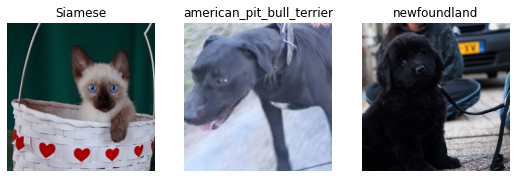

In [0]:
dls.show_batch(nrows=1, ncols=3)

In [0]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)

In [0]:
learn.summary()

Sequential (Input shape: ['64 x 3 x 224 x 224'])
Layer (type)         Output Shape         Param #    Trainable 
Conv2d               64 x 64 x 112 x 112  9,408      False     
________________________________________________________________
BatchNorm2d          64 x 64 x 112 x 112  128        True      
________________________________________________________________
ReLU                 64 x 64 x 112 x 112  0          False     
________________________________________________________________
MaxPool2d            64 x 64 x 56 x 56    0          False     
________________________________________________________________
Conv2d               64 x 64 x 56 x 56    36,864     False     
________________________________________________________________
BatchNorm2d          64 x 64 x 56 x 56    128        True      
________________________________________________________________
ReLU                 64 x 64 x 56 x 56    0          False     
_________________________________________________

In [0]:
x,y = dls.one_batch()
x.shape, y.shape

(torch.Size([64, 3, 224, 224]), torch.Size([64]))

In [0]:
# forward pass output
activs = learn.model(x)
activs

tensor([[-3.1300, -2.3518, -0.7059,  ..., -2.4479, -6.1896,  1.3033],
        [-2.0607, -1.5732,  1.0213,  ..., -2.2584, -6.2058,  1.8763],
        [-2.8089, -3.9127,  0.9764,  ...,  0.1213, -8.7514,  4.9692],
        ...,
        [ 0.7510, -2.8764,  1.7136,  ..., -0.2926, -5.7225,  3.8307],
        [-4.1510, -0.3063, -1.3517,  ..., -2.8352, -6.1698,  1.9486],
        [ 0.2160, -5.0710, -2.3242,  ..., -3.0351, -5.3336,  1.3065]],
       device='cuda:0', grad_fn=<MmBackward>)

In [0]:
preds = torch.softmax(activs, dim=1)
preds

tensor([[8.3363e-06, 1.8154e-05, 9.4133e-05,  ..., 1.6490e-05, 3.9102e-07,
         7.0202e-04],
        [2.4212e-05, 3.9422e-05, 5.2786e-04,  ..., 1.9868e-05, 3.8357e-07,
         1.2412e-03],
        [6.1686e-05, 2.0456e-05, 2.7172e-03,  ..., 1.1555e-03, 1.6195e-07,
         1.4729e-01],
        ...,
        [8.3613e-04, 2.2228e-05, 2.1894e-03,  ..., 2.9446e-04, 1.2908e-06,
         1.8186e-02],
        [4.5834e-06, 2.1425e-04, 7.5322e-05,  ..., 1.7085e-05, 6.0879e-07,
         2.0428e-03],
        [9.5751e-06, 4.8423e-08, 7.5498e-07,  ..., 3.7087e-07, 3.7238e-08,
         2.8494e-05]], device='cuda:0', grad_fn=<SoftmaxBackward>)

In [0]:
preds.sum(axis=1)

tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000], device='cuda:0', grad_fn=<SumBackward1>)

There are 64 images in a batch and each image has37 categories and hence the shape

In [0]:
log_preds = torch.log(preds)
log_preds.shape

torch.Size([64, 37])

In [0]:
nll_loss = F.nll_loss(log_preds, y, reduction='none')
nll_loss

tensor([12.6506,  9.6268,  1.2001, 10.8076,  5.9677, 13.9482,  6.2066, 11.6219,
        13.8144,  8.9536,  6.2796,  7.2452,  7.3411,  5.6199, 13.0593,  5.3035,
        14.0365,  7.1896, 18.0769,  2.5999, 13.8957, 15.8312,  8.5542, 10.9269,
        13.5656, 15.6590,  8.9636,  9.8664,  3.9327, 13.4367,  5.4209,  9.2218,
         5.9882,  6.8469, 16.6756, 13.5373,  8.1745,  8.3417, 11.9571,  9.7119,
        17.0041, 13.4304, 20.6669, 10.8486, 12.5587,  5.6925, 11.0843, 10.0903,
        14.3639,  6.9740,  9.5803,  5.1273, 16.5682,  5.8782, 10.0003,  2.2895,
        12.5348, 27.9981, 10.0705, 14.9699,  3.5613,  4.0071,  1.0050, 14.7841],
       device='cuda:0', grad_fn=<NllLossBackward>)

In [0]:
F.cross_entropy(activs, y, reduction='none')

tensor([12.6506,  9.6268,  1.2001, 10.8076,  5.9677, 13.9482,  6.2066, 11.6219,
        13.8144,  8.9536,  6.2796,  7.2452,  7.3411,  5.6199, 13.0593,  5.3035,
        14.0365,  7.1896, 18.0769,  2.5999, 13.8957, 15.8312,  8.5542, 10.9269,
        13.5656, 15.6590,  8.9636,  9.8664,  3.9327, 13.4367,  5.4209,  9.2218,
         5.9882,  6.8469, 16.6756, 13.5373,  8.1745,  8.3417, 11.9571,  9.7119,
        17.0041, 13.4304, 20.6669, 10.8486, 12.5587,  5.6925, 11.0843, 10.0903,
        14.3639,  6.9740,  9.5803,  5.1273, 16.5682,  5.8782, 10.0003,  2.2895,
        12.5348, 27.9981, 10.0705, 14.9699,  3.5613,  4.0071,  1.0050, 14.7841],
       device='cuda:0', grad_fn=<NllLossBackward>)

---

## Multi-category cross-entropy loss: 

Using Pascal dataset

In [0]:
from fastai2.vision.all import *

In [0]:
path = untar_data(URLs.PASCAL_2007)

In [13]:
df = pd.read_csv(path/'train.csv')
df.head()

,fname,labels,is_valid
0,000005.jpg,chair,True
1,000007.jpg,car,True
2,000009.jpg,horse person,True
3,000012.jpg,car,False
4,000016.jpg,bicycle,True


In [0]:
def get_x(r): return path/'train'/r['fname']
def get_y(r): return r['labels'].split(' ')

def splitter(df):
    train = df.index[~df['is_valid']].tolist()
    valid = df.index[df['is_valid']].tolist()
    return train,valid

dblock = DataBlock(blocks=(ImageBlock, MultiCategoryBlock),
                   splitter=splitter,
                   get_x=get_x, 
                   get_y=get_y,
                   item_tfms = RandomResizedCrop(128, min_scale=0.35))
dls = dblock.dataloaders(df)

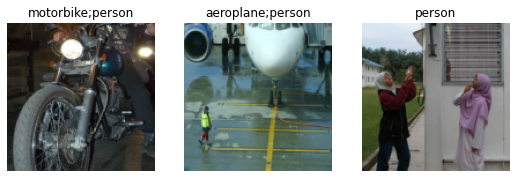

In [15]:
dls.show_batch(nrows=1, ncols=3)

In [0]:
# Get one batch of data
x,y = dls.train.one_batch()

In [17]:
x.shape

torch.Size([64, 3, 128, 128])

In [18]:
# Using torch.where to see the multiple labels
idxs = torch.where(y[0]==1.)[0]
idxs

tensor([11], device='cuda:0')

In [19]:
# getting the respective labels from dls.vocab
dls.train.vocab[idxs]

(#1) ['dog']

In [0]:
# Creating a learner
learn = cnn_learner(dls, resnet18)

In [21]:
# Forward pass
activs = learn.model(x)
activs.shape

torch.Size([64, 20])

In [22]:
activs[0].shape, y[0].shape

(torch.Size([20]), torch.Size([20]))

In [0]:
# Defining the loss
def binary_cross_entropy(inputs, targets):
    inputs = inputs.sigmoid()
    return torch.where(targets==1, 1-inputs, inputs).log().mean()

In [24]:
binary_cross_entropy(activs[0], y[0])

tensor(-0.7665, device='cuda:0', grad_fn=<MeanBackward0>)

In [25]:
# Pytorch equivalent
loss_func = nn.BCEWithLogitsLoss()
loss = loss_func(activs[0], y[0])
loss

tensor(1.1986, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)

In [26]:
loss_func = nn.BCELoss()
loss = loss_func(torch.sigmoid(activs[0]), y[0])
loss

tensor(1.1986, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward>)

Why is there so much difference between `ninary_cross_entropy` and `nn.BCEWithLogitsLoss`??

In [0]:
def accuracy_multi(inp, targ, thresh=0.5, sigmoid=True):
    "Compute accuracy when `inp` and `targ` are the same size."
    if sigmoid: inp = inp.sigmoid()
    return ((inp>thresh)==targ.bool()).float().mean()

In [28]:
accuracy_multi(activs[0], y[0])

tensor(0.4500, device='cuda:0')

---
---

In [29]:
# Creating random activations for simulation of cross-entropy loss fro 6 images
acts = torch.randn((6,3))*2
acts

tensor([[ 0.5263, -2.5497, -0.6424],
        [ 0.3280,  1.1601, -2.7514],
        [ 1.9942, -2.0624,  4.6650],
        [-1.1126,  1.2844,  2.6702],
        [ 0.2477, -1.4378,  2.2565],
        [-2.3366, -0.1697, -0.2927]])

In [0]:
# Defining random labels for the 6 images
targ = tensor([0,0,1],
              [1,0,1],
              [0,1,1],
              [1,1,1],
              [1,1,0],
              [0,0,0],)

In [31]:
# Step 1: Calculate the sigmoid of the activations/logits
sm_acts = torch.sigmoid(acts)
sm_acts

tensor([[0.6286, 0.0724, 0.3447],
        [0.5813, 0.7614, 0.0600],
        [0.8802, 0.1128, 0.9907],
        [0.2474, 0.7832, 0.9352],
        [0.5616, 0.1919, 0.9052],
        [0.0881, 0.4577, 0.4273]])

In [32]:
inputs = sm_acts
torch.where(targ==1, 1-inputs, inputs).log()

tensor([[-0.4642, -2.6249, -0.4227],
        [-0.8705, -0.2727, -0.0619],
        [-0.1276, -0.1197, -4.6744],
        [-0.2842, -1.5288, -2.7371],
        [-0.8247, -0.2131, -0.0996],
        [-2.4289, -0.7816, -0.8502]])

In [33]:
targ

tensor([[0, 0, 1],
        [1, 0, 1],
        [0, 1, 1],
        [1, 1, 1],
        [1, 1, 0],
        [0, 0, 0]])

In [34]:
# checking the accuracy of the forward pass
accuracy_multi(acts, targ)

tensor(0.5000)